In [1]:
# Step 1: Import required library
import pandas as pd

# Step 2: Load the dataset (uploaded in Files section)
df = pd.read_csv("Dataset .csv")  # Make sure file name matches

# Step 3: Display basic info
print("Columns in the dataset:")
print(df.columns)
df.head()


Columns in the dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [2]:
#Analyze Top 3 Cuisines
# Drop rows where 'Cuisines' is missing
df = df.dropna(subset=['Cuisines'])

# Explode cuisine combinations
cuisine_list = df['Cuisines'].str.split(', ').explode()

# Find top 3 cuisines
top_cuisines = cuisine_list.value_counts().head(3)
print("Top 3 Most Common Cuisines:\n", top_cuisines)


Top 3 Most Common Cuisines:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [3]:
# Total number of restaurants
total_restaurants = len(df)

# Calculate and display percentage for top 3 cuisines
print("\nPercentage of Restaurants Serving Each:")
for cuisine in top_cuisines.index:
    count = df['Cuisines'].str.contains(cuisine, na=False).sum()
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {percentage:.2f}%")



Percentage of Restaurants Serving Each:
North Indian: 41.50%
Chinese: 28.64%
Fast Food: 20.82%


In [4]:
import matplotlib.pyplot as plt


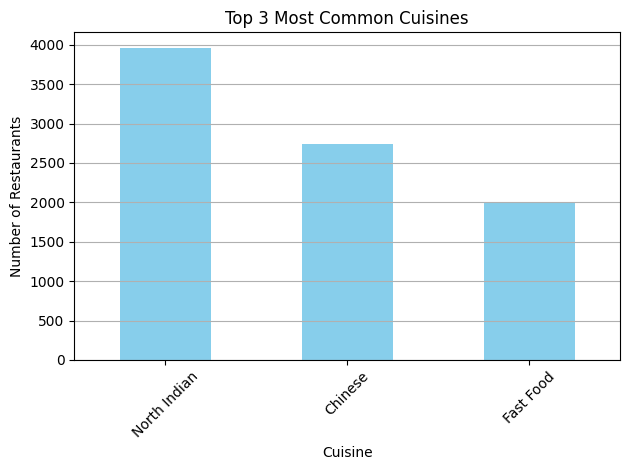

In [5]:
# Plotting a bar chart
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


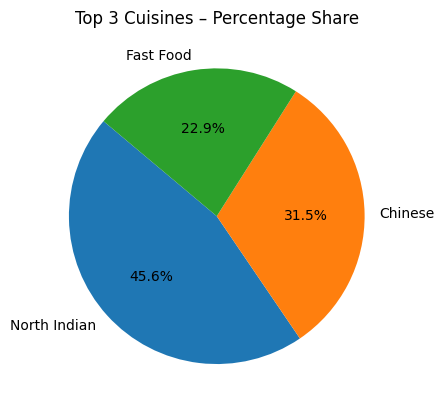

In [6]:
# Plotting a pie chart
top_cuisines.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Cuisines – Percentage Share')
plt.ylabel('')  # Hides the y-label
plt.show()
